# Project: UNRAVELING THE DYNAMICS OF FOOD SHORTAGES IN AFRICA OVER THE PAST DECADE (2004 - 2013)

__BY__

## AMADI EMMANUEL O.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this section of the report, I provided a brief introduction to the dataset to be used for analysis. At the end of this section, I described the questions that I plan on exploring over the course of the report by analyzing at least one dependent variable at a time.


## The First Step was to import the necessary libraries used for data analysis

In [77]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

## Data Wrangling and Cleaning

### This stage comprised mostly of the following steps:
- Importation of Datasets
- Cleaning of Datasets
- Merging of Datasets

#### The Food Production Dataset was Imported for cleaning 

In [78]:
#Load the first dataset
production_df = pd.read_csv("Africa Food Production (2004 - 2013).csv")
production_df.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [79]:
#check shape of dataset
production_df.shape

(23110, 4)

In [80]:
production_df.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [81]:
#check for the data type of the columns
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [82]:
type_year_pro = { "Year" : "category"}
production_df = production_df.astype(type_year_pro)
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  23110 non-null  object  
 1   Item     23110 non-null  object  
 2   Year     23110 non-null  category
 3   Value    23110 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 564.7+ KB


In [83]:
first_group = production_df.groupby(['Country', 'Item', 'Year']).sum()
first_group.head(20)

Value
Country Item                Year       
Algeria Alcohol, Non-Food   2004      0
                            2005      0
                            2006      0
                            2007      0
                            2008      0
                            2009      0
                            2010      0
                            2011      0
                            2012      0
                            2013      0
        Apples and products 2004    165
                            2005    200
                            2006    283
                            2007    190
                            2008    261
                            2009    267
                            2010    379
                            2011    404
                            2012    398
                            2013    456

In [84]:
production_df = production_df.groupby(['Country', 'Year']).sum().reset_index()
production_df

C:\Users\User\AppData\Local\Temp\ipykernel_5656\1809881594.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


#### The Food Supply Dataset was also Imported 

In [85]:
# Importing the second dataset
supply_df = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
supply_df.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [86]:
supply_df.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [87]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [88]:
type_year_sup = { "Year" : "category"}
supply_df = supply_df.astype(type_year_sup)
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  450 non-null    object  
 1   Year     450 non-null    category
 2   Value    450 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 8.0+ KB


### The next step was to merge the two datasets together as one 

In [89]:
# merging the two datasets 
total_df = pd.merge(left = production_df, right = supply_df, on = ['Country', 'Year'], how ='left')
total_df

,Country,Year,Value_x,Value_y
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048
...,...,...,...,...
445,Zimbabwe,2009,5754,2147
446,Zimbabwe,2010,6777,2168
447,Zimbabwe,2011,7551,2200
448,Zimbabwe,2012,8173,2197


In [90]:
total_df = total_df.rename(columns={
    "Value_x" : "Production_Value", "Value_y" : "Supply_Value"
})
total_df

,Country,Year,Production_Value,Supply_Value
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048
...,...,...,...,...
445,Zimbabwe,2009,5754,2147
446,Zimbabwe,2010,6777,2168
447,Zimbabwe,2011,7551,2200
448,Zimbabwe,2012,8173,2197


In [91]:
# Import the UNICEF regional data
regions_df = pd.read_excel("JME_Regional-Classifications.xlsx")[[ 'Country', 'UN Sub Region', 'World Bank Income Groups Combined']]
regions_df.head()

,Country,UN Sub Region,World Bank Income Groups Combined
0,Afghanistan,Southern Asia,Low Income
1,Albania,Southern Europe,Middle Income
2,Algeria,Northern Africa,Middle Income
3,Andorra,Southern Europe,High Income
4,Angola,Middle Africa,Middle Income


In [92]:
# merge the regions data with the total_df dataset
total_df = pd.merge(left=total_df, right=regions_df, on = 'Country', how='left')
total_df

,Country,Year,Production_Value,Supply_Value,UN Sub Region,World Bank Income Groups Combined
0,Algeria,2004,15536,2987,Northern Africa,Middle Income
1,Algeria,2005,15667,2958,Northern Africa,Middle Income
2,Algeria,2006,16417,3047,Northern Africa,Middle Income
3,Algeria,2007,14763,3041,Northern Africa,Middle Income
4,Algeria,2008,13841,3048,Northern Africa,Middle Income
...,...,...,...,...,...,...
445,Zimbabwe,2009,5754,2147,Eastern Africa,Low Income
446,Zimbabwe,2010,6777,2168,Eastern Africa,Low Income
447,Zimbabwe,2011,7551,2200,Eastern Africa,Low Income
448,Zimbabwe,2012,8173,2197,Eastern Africa,Low Income


In [93]:
total_df = total_df.rename(columns={
    "UN Sub Region" : "Sub Region", "World Bank Income Groups Combined" : "Income group"
})
total_df

,Country,Year,Production_Value,Supply_Value,Sub Region,Income group
0,Algeria,2004,15536,2987,Northern Africa,Middle Income
1,Algeria,2005,15667,2958,Northern Africa,Middle Income
2,Algeria,2006,16417,3047,Northern Africa,Middle Income
3,Algeria,2007,14763,3041,Northern Africa,Middle Income
4,Algeria,2008,13841,3048,Northern Africa,Middle Income
...,...,...,...,...,...,...
445,Zimbabwe,2009,5754,2147,Eastern Africa,Low Income
446,Zimbabwe,2010,6777,2168,Eastern Africa,Low Income
447,Zimbabwe,2011,7551,2200,Eastern Africa,Low Income
448,Zimbabwe,2012,8173,2197,Eastern Africa,Low Income


<a id='eda'></a>
## Exploratory Data Analysis

### Research Questions


### 1. Total Food Produced

#### How much food was produced within the stipulated time frame? What is the distribution per:
- Country
- Region
- Year


#### Distribution per Country

In [94]:
# Grouping and sorting by countries production values
count_by_country = total_df.groupby(["Country"]).sum().sort_values(by='Production_Value', ascending=False).reset_index()
count_by_country

C:\Users\User\AppData\Local\Temp\ipykernel_5656\3275656124.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Production_Value,Supply_Value
0,Nigeria,1628030,26988
1,Egypt,877498,34580
2,South Africa,579592,29629
3,Ethiopia,350693,20292
4,United Republic of Tanzania,332802,21550
5,Sudan,301584,23238
6,Ghana,295004,29180
7,Uganda,278421,22205
8,Morocco,271821,32967
9,Kenya,256872,21453


In [95]:
px.bar(data_frame = count_by_country, 
       x='Production_Value', y='Country', 
       template = 'plotly_dark', color = 'Country', 
       title = 'DISTRIBUTION OF TOTAL FOOD PRODUCTION OF AFRICAN COUNTRIES FROM 2004-2013')

__OBSERVATION__:
From the visual above, it is seen that the top 3 countries are:
- Nigeria
- Egypt
- South Africa

Of these countries, __Nigeria__ produced the most amount of food during that time period with a value of about __1.62million tons__. This value is almost twice the value of Egypt and about three times the value of South Africa.
Also, we can conclude that the most food producing country in West Africa is Nigeria, Egypt leads North Africa in food production while South Africa leads in the southern part of Africa.
Further research revealed that two of the most contributing factors to increase in food production in Nigeria are 
- Human Capital
- Government Policies

#### Distribution by Region

In [96]:
# How much food was produced in each subregion for the period under review?
count_by_subregion = total_df.groupby(["Sub Region"]).sum().reset_index()
count_by_subregion

C:\Users\User\AppData\Local\Temp\ipykernel_5656\2621815973.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sub Region,Production_Value,Supply_Value
0,Eastern Africa,1966802,266662
1,Middle Africa,503677,161680
2,Northern Africa,1732266,154958
3,Southern Africa,665047,122253
4,Western Africa,2524838,378180


In [97]:
px.pie(data_frame=count_by_subregion, 
       values='Production_Value', names = "Sub Region", title="AMOUNT OF FOOD PRODUCED PER REGION (2004 -2013)")

The above pie chart shows the distribution of food production per region for the time period in question. __Western Africa__ tops the chart with __34.2%__ followed by Eastern Africa with __26.6%__. Northern Africa comes in third place with __23.4%__. The least producing region of food is Middle Africa with __6.81%__. 
Upon further research, it was revealed that the reason why Middle Africa has the least production is due to its few number of countries (9). Western Africa on the other hand has high food production due to high population of countries in this region as stated earlier. Countries like Nigeria have very high population and therefore have high human capital in the agricultural sector. 

Also, another reason for increased food production in Western Africa was due to economic policies of the government then eg. Operation feed the Nation, Green revolution etc.

#### Distribution by Year

In [98]:
total_df.describe()

,Production_Value,Supply_Value
count,450.000000,450.000000
mean,16833.591111,2469.775556
std,27707.501219,379.140143
min,55.000000,1781.000000
25%,2299.250000,2174.000000
50%,7884.500000,2376.000000
75%,20712.750000,2681.750000
max,179631.000000,3561.000000


In [99]:
# The box plot below shows us the distribution of the data. 
# This will help us identify the outliers and adequately group the data into intervals
fig1 = px.box(data_frame=total_df, x = 'Year', y='Production_Value') 
fig1

From the plot shown above, the distribution of food production per year is shown, along with important statistical measures like the minimum food produced per year, upper fence of food produced per year, median per year and values above the upper fence which are known as outliers.
From the bar chart shown initially, the outliers are values that belong to the top 3 food producing countries within the time frame. That is, they belong to __Nigeria__, __Egypt__ and __South Africa__.

Also, the distribution when observed shows a sinusoidal form of graph in the sense that, the values were not always increasing progressively, they increased for a while during the years and then fell before rising again.


Also, the total food produced during the years in question were plotted as shown below:

In [100]:
grouped_year = production_df.groupby('Year').sum().reset_index()
grouped_year

C:\Users\User\AppData\Local\Temp\ipykernel_5656\2260451615.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


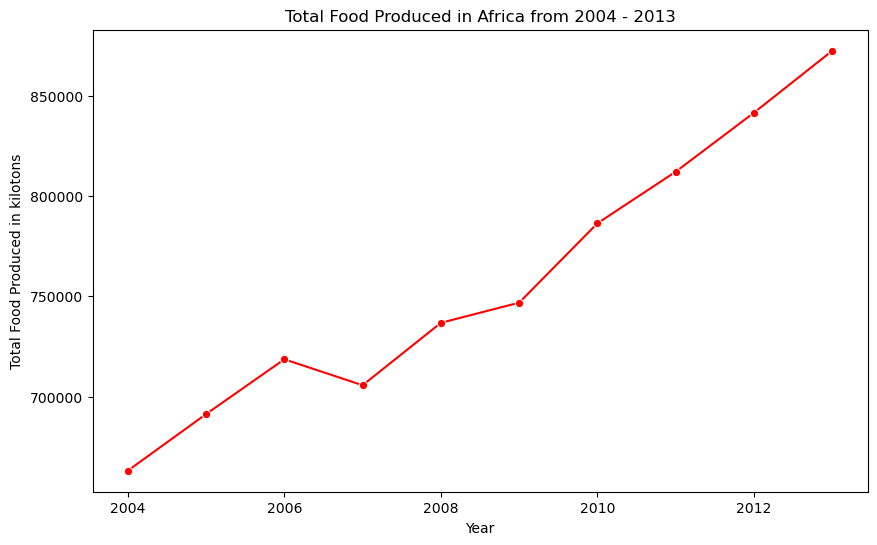

In [101]:
# bar plot showing the total food produced from 2004-2013
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_year, x='Year', y='Value', errorbar=None,color='red', marker = 'o' )
sns.lineplot()
plt.title('Total Food Produced in Africa from 2004 - 2013')
plt.xlabel('Year')
plt.ylabel('Total Food Produced in kilotons')
plt.show()

The line plot above shows the total food produced in africa from 2004 - 2013. The number of food produced increased progressively as the year progressed except in 2007 when it fell. Further research into this revealed that in the year 2007, there was crop failure in the southern part of Africa, owing to climate change and this affected the production of food that year in countries like Lesotho and South Africa and this information correlated with that of our dataset as seen in the boxplot.

__Total Food Produced by Countries in Africa__

In [102]:
bin_edges = [0, 50000, 150000, 350000, count_by_country["Production_Value"].max()]
bin_labels = ["Low Food Production (0-50k)", "Moderate Food Production (>50k - 150k)", "High Food Production (>150k - 350k)", "Very High Food Production (>350k)"]
count_by_country["Food Production Level"] = pd.cut(x=count_by_country["Production_Value"], bins=bin_edges, labels=bin_labels, right=True)
count_by_country

,Country,Production_Value,Supply_Value,Food Production Level
0,Nigeria,1628030,26988,Very High Food Production (>350k)
1,Egypt,877498,34580,Very High Food Production (>350k)
2,South Africa,579592,29629,Very High Food Production (>350k)
3,Ethiopia,350693,20292,Very High Food Production (>350k)
4,United Republic of Tanzania,332802,21550,High Food Production (>150k - 350k)
5,Sudan,301584,23238,High Food Production (>150k - 350k)
6,Ghana,295004,29180,High Food Production (>150k - 350k)
7,Uganda,278421,22205,High Food Production (>150k - 350k)
8,Morocco,271821,32967,High Food Production (>150k - 350k)
9,Kenya,256872,21453,High Food Production (>150k - 350k)


In [106]:
# map representation of total food produced over time
color_discrete_map = {
    "Very High Food Production (>350k)": "#228B22",
    "High Food Production (>150k - 350k)": "#4CBB17",
    "Moderate Food Production (>50k - 150k)": "#7CFC00",
    "Low Food Production (0-50k)": "#90EE90"
}

map_plot = px.choropleth(data_frame=count_by_country, locations="Country", locationmode="country names", scope='africa', 
              color='Food Production Level', color_discrete_map=color_discrete_map,
             hover_data=count_by_country[["Food Production Level", "Production_Value", "Country"]],
             height=600, width=800)

# update layout
map_plot.update_layout(title="Distribution of Total Food Production by Country (2004-2013)",
                      margin={"r":0, "t":40, "l":0, "b":0})
map_plot.show()

The chloropleth map above shows the distribution of food production over the years in question. From the map, it was noticed that many countries in middle africa do not produce much food. This is due to the landlocked nature of many countries in this region that deprives them of water and makes them unable to plant much.

Surprisingly, Ethiopia which is one of the countries in eastern Africa that is affected by drought was one of the highest food producing countries despite their condition. More research should be given to this but one of the reasons could be that they may also offer other agricultural produce other than food like honey, wine, beer etc in additon to food.

#### What was the Food most Produced within the time frame given?

In [107]:
# we want to find out which food items were the most produced
item_class = first_group.groupby(['Item']).sum().sort_values(by='Value', ascending=False).reset_index()
item_class

,Item,Value
0,Cassava and products,1118948
1,Sugar cane,887008
2,Maize and products,574948
3,Yams,511523
4,"Vegetables, Other",410403
...,...,...
89,Cloves,249
90,"Molluscs, Other",214
91,Pepper,199
92,"Fish, Liver Oil",28


In [108]:
px.bar(data_frame = item_class, x = 'Value', y = 'Item')

__OBSERVATION:__
From the bar plot above, it is seen that the food most produced in Africa is __Cassava__ with a value of about __1.118mil tons__. Next in line is __Sugar Cane__ with a value of __887kilo tons__. Others include Maize, Yams, Vegetables and Milk while the least produced item is aquatic animals.

Rice which is one of the most eaten food in Africa came number 13 on the scale of most produced foods but recent studies show that it has moved up in ranks to become the 5th most produced food in Africa. Meanwhile, Cassava, sugar cane and maize still top the charts till date.

### 2. Total Food Supplied

#### How much food was supplied within the stipulated time frame? What is the distribution per:
- Country
- Region
- Year

In [109]:
# Grouping and sorting by countries production values
sup_by_country = total_df.groupby(["Country"]).sum().sort_values(by='Supply_Value', ascending=False).reset_index()
sup_by_country

C:\Users\User\AppData\Local\Temp\ipykernel_5656\3646623869.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Production_Value,Supply_Value
0,Egypt,877498,34580
1,Tunisia,92713,33055
2,Morocco,271821,32967
3,Algeria,188650,31118
4,Mauritius,51785,30543
5,South Africa,579592,29629
6,Ghana,295004,29180
7,Cote d'Ivoire,182486,27666
8,Mali,92292,27502
9,Mauritania,10039,27443


In [110]:
sup_by_country.describe()
# mean food supplied = 24697.76 kilotons

,Production_Value,Supply_Value
count,4.500000e+01,45.000000
mean,1.683359e+05,24697.755556
std,2.782814e+05,3752.547402
min,6.660000e+02,18701.000000
25%,2.492100e+04,21702.000000
50%,8.680800e+04,23784.000000
75%,1.954990e+05,26988.000000
max,1.628030e+06,34580.000000


In [111]:
px.bar(data_frame = sup_by_country, 
       x='Supply_Value', y='Country', 
       template = 'plotly_dark', color = 'Country', 
       title = 'DISTRIBUTION OF TOTAL FOOD SUPPLY OF AFRICAN COUNTRIES FROM 2004-2013')

From the Bar chart shown above, the country with most food supply is Egypt while the least supplied is Zambia. The rest countries are scattered evenly in between. Countries with low food supply are succeptible to food shortage, especially if the food per person is low.

#### Distribution of Food Supplied per Year

In [112]:
supply_data = supply_df.groupby(['Year']).sum().sort_values(by='Value', ascending=False).reset_index()

supply_data

C:\Users\User\AppData\Local\Temp\ipykernel_5656\1378618444.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Year,Value
0,2013,113951
1,2012,113744
2,2011,113194
3,2010,112383
4,2009,111700
5,2008,110734
6,2007,110149
7,2006,109386
8,2005,108418
9,2004,107740


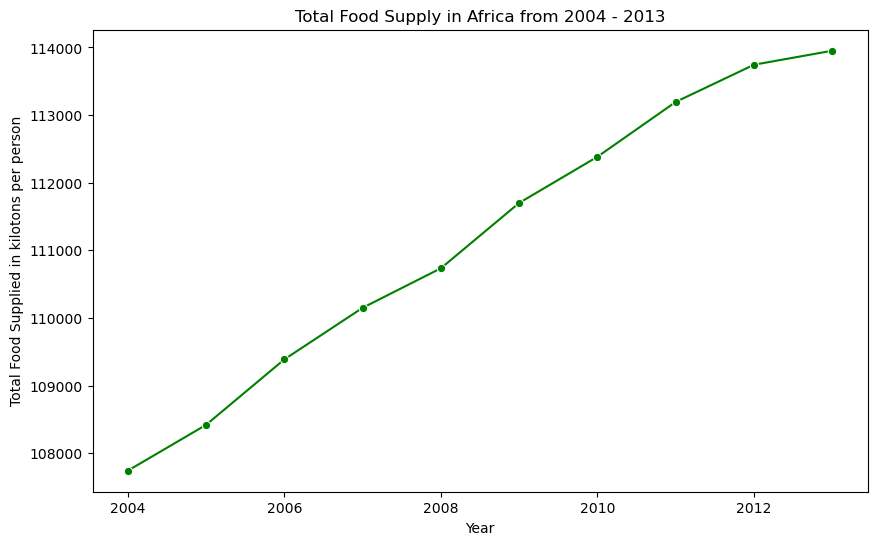

In [113]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=supply_data, x='Year', y='Value', errorbar=None,color='green', marker = 'o')
plt.title('Total Food Supply in Africa from 2004 - 2013')
plt.xlabel('Year')
plt.ylabel('Total Food Supplied in kilotons per person')
plt.show()

The line plot above shows a consistent rise along the years in the total food supplied in kilotons. 

In [114]:
count_by_subregion = total_df.groupby(["Sub Region", "Year"]).sum().reset_index()
count_by_subregion

C:\Users\User\AppData\Local\Temp\ipykernel_5656\3868101067.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sub Region,Year,Production_Value,Supply_Value
0,Eastern Africa,2004,168555,25596
1,Eastern Africa,2005,172117,26098
2,Eastern Africa,2006,183047,26341
3,Eastern Africa,2007,182970,26399
4,Eastern Africa,2008,177398,26420
5,Eastern Africa,2009,191395,26896
6,Eastern Africa,2010,212028,27064
7,Eastern Africa,2011,218228,27225
8,Eastern Africa,2012,228069,27306
9,Eastern Africa,2013,232995,27317


#### Distribution by Income Group
The distribution could also be studied with respect to income grouping of the countries. The distribution of countries in this regard speaks about the relationship between food prodution, supply and the economy of a country.

In [115]:
count_by_income = total_df.groupby("Income group").sum().reset_index()
count_by_income

C:\Users\User\AppData\Local\Temp\ipykernel_5656\233347118.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Income group,Production_Value,Supply_Value
0,Low Income,2234884,482085
1,Middle Income,5157746,601648


<Axes: >

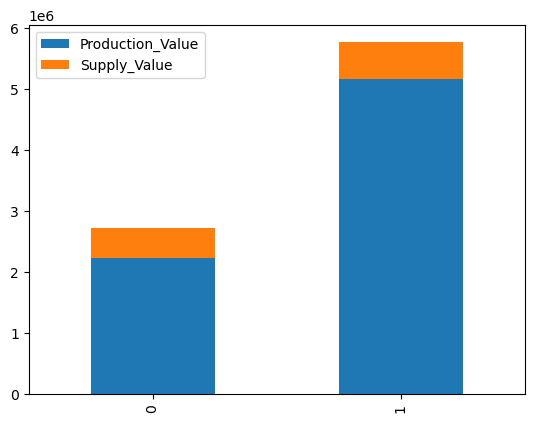

In [116]:
count_by_income.plot(kind ='bar', stacked = True, )

The graph shows that countries in the low income group have low food production and supply while countries in middle income group have higher food production and supply. Also, from the graph, one very important factor of income group is food production as we see that the middle income countries produce about twice the amount that low income countries do.

### 3. RELATIONSHIP BETWEEN FOOD PRODUCED AND FOOD SUPPLIED

__ARE THEY RELATED TO OR DEPENDENT ON EACH OTHER?__ 

__DOES INCREASE IN ONE INDICATE INCREASE IN THE OTHER?__


In [117]:
# find the correlation between the both columns
correlation_factor = total_df['Production_Value'].corr(total_df['Supply_Value'])
print (round (correlation_factor, 2))

0.31


This value shows that there is a __weak, positive correlation__ or relationship between food produced and food supplied.

The next step is to find out the relationship visually by displaying the values of both food production and food supplied for both country and region during the years in question

#### RELATIONSHIP BETWEEN COUNTRIES

In [118]:
# A scatterplot can be plotted to show this relationship
fig = px.scatter(total_df, x = 'Supply_Value', 
           y = 'Production_Value', 
           color= 'Country', 
        title = 'ANIMATED SCATTER PLOT OF FOOD PRODUCTION AND SUPPLY DURING THE TIME PERIOD FOR COUNTRIES',
           template = 'plotly_dark',
           color_discrete_sequence = px.colors.qualitative.Prism,
           animation_frame = 'Year', 
           animation_group = 'Country')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig

#### RELATIONSHIP BETWEEN SUB-REGION

In [119]:
fig = px.scatter(count_by_subregion, x = 'Supply_Value', 
           y = 'Production_Value', 
           color= 'Sub Region',
            title = 'AN ANIMATED SCATTER PLOT FOR AFRICAN SUB REGIONS DURING THE TIME PERIOD',
           template = 'plotly_dark',
           color_discrete_sequence = px.colors.qualitative.Prism,
           animation_frame = 'Year', 
           animation_group = 'Sub Region')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig

<a id='conclusions'></a>
## Conclusions

From the visualizations seen and analyzed, 
- The food production trend is such that it is continuously increasing. From the line graphs plotted, we see a constant increase in food produced and food supplied and it is predicted to go even higher because of increasing population which leads to increase in the work force and also increase in qquantity of food supplied.
- Countries that were among the least producing were not also among the least supplied. This means that the rate of food importation is high in such countries like Djibouti for example which imports about 90% of its food.
- Food shortage is a threatening condition to a lot of countries in Africa. Government of countries should initiate agro-friendly policies that would encourage the citizens to go into agriculture. 
- Countries, especially, those in Middle Africa should figure out ways to increase agricultural production in order to improve economic level and mitigate the issue of food shortage.

